C:\Users\soura\AppData\Local\Temp\ipykernel_17188\248864026.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = int(m * 0 + c)
C:\Users\soura\AppData\Local\Temp\ipykernel_17188\248864026.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2 = int(m * width + c)


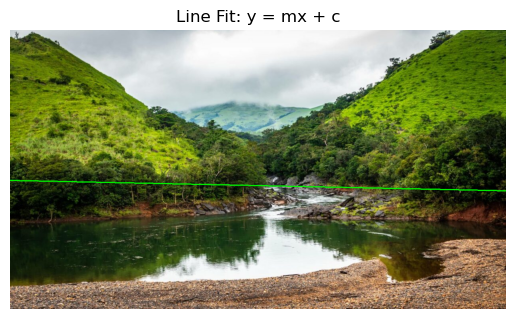

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('sample-image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge detection
edges = cv2.Canny(gray, 50, 150)

# Extract edge points
points = np.column_stack(np.where(edges > 0))
points = points[:, [1, 0]]  # Swap to (x, y) format

# Fit line using least squares
if len(points) > 0:
    vx, vy, x0, y0 = cv2.fitLine(points, cv2.DIST_L2, 0, 0.01, 0.01)
    m = vy / vx
    c = y0 - m * x0

    # Define endpoints of the fitted line
    height, width = img.shape[:2]
    y1 = int(m * 0 + c)
    y2 = int(m * width + c)

    # Draw the line on the image
    cv2.line(img, (0, y1), (width, y2), (0, 255, 0), 2)

# Display result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Line Fit: y = mx + c')
plt.axis('off')
plt.show()